20213043 이세현

In [1]:
import pandas as pd

data = pd.read_csv("iris.data", names=['a', 'b', 'c', 'd', 'label'])
data

,a,b,c,d,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
import torch

data_x = torch.from_numpy(data.iloc[:, :4].values)
data_y = data.iloc[:, 4]

/home/sehyeon/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


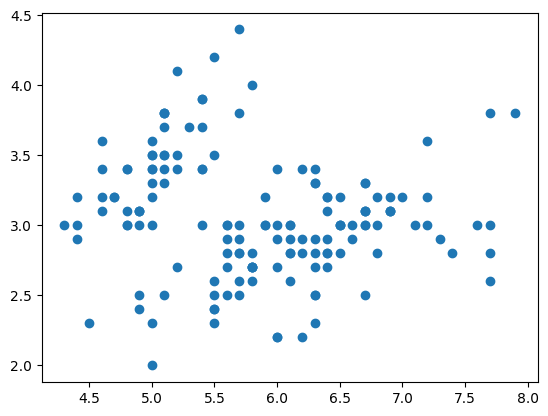

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data_x[:,0], data_x[:,1])
plt.show()

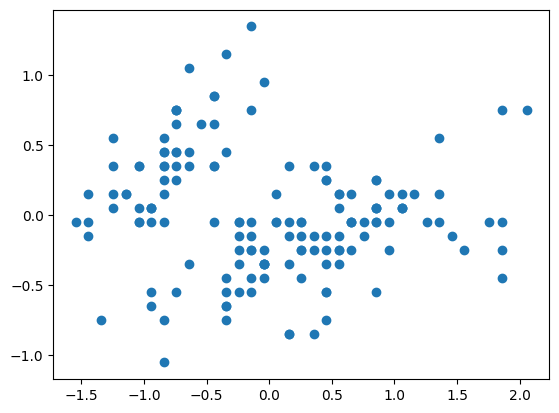

In [4]:
# data_x.mean(dim=0) # 각 축마다 평균 -> 평균을 뜻하는 벡터
data_x_move = data_x - data_x.mean(dim=0)
plt.scatter(data_x_move[:,0], data_x_move[:,1])
plt.show()

In [5]:
X = data_x - data_x.mean(dim=0)

In [6]:
def findPC(X):
    w = torch.randn(X.shape[1])
    w_size = (w * w).sum() ** 0.5
    w /= w_size

    lr = 0.1

    for epoch in range(100):
        w.requires_grad_(True)
        variance = -((X * w).sum(dim=1) ** 2).mean()

        variance.backward()

        with torch.no_grad():
            w = w - lr * w.grad
            w /= (w*w).sum() ** 0.5
            # print(f"{w}, {variance}")

        w.requires_grad_(False)
    return w, -variance.item()

w, v = findPC(X)
print(w, v)

tensor([-0.3616,  0.0823, -0.8566, -0.3588]) 4.196675294151801


In [7]:
pcs = []
vars = []

def PCA(k, X):
    Z = X - X.mean(dim=0)

    for i in range(k):
        w, v = findPC(Z)
        pcs.append(w)
        vars.append(v)

        Z = Z - w * (Z  * w).sum(dim=1).unsqueeze(1)
    return pcs, vars

res = PCA(4, X)
print(res)

([tensor([ 0.3616, -0.0823,  0.8566,  0.3588]), tensor([ 0.6446,  0.7396, -0.1846, -0.0578]), tensor([ 0.4197, -0.1806,  0.8647, -0.2088]), tensor([-0.3760,  0.7933,  0.4698,  0.0928])], [4.1966752941518, 0.24051337060083924, 0.015835913050756992, 0.05641917194151971])


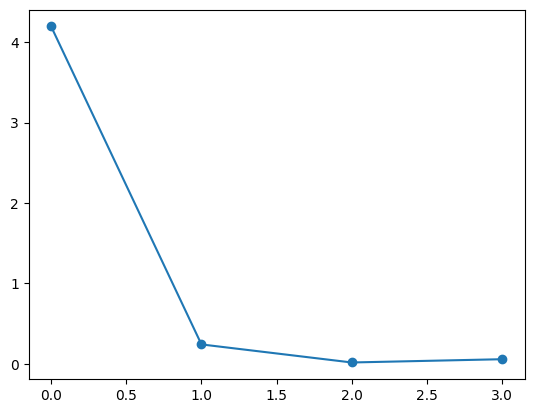

In [8]:
plt.plot(vars, "-o")
plt.show()

In [9]:
X = torch.tensor(X, dtype=torch.float)
XX = X @ torch.stack(pcs[:2]).T

/tmp/ipykernel_5416/996377283.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


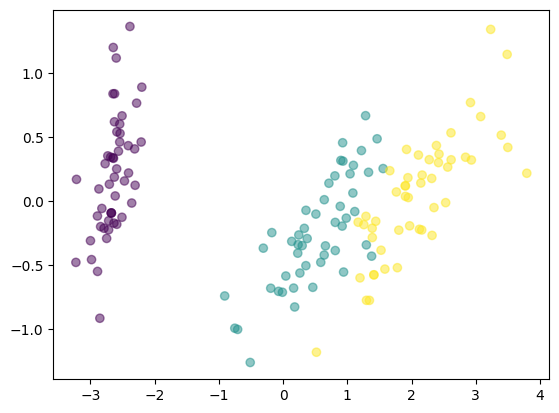

In [10]:
species = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

plt.scatter(XX[:,0], XX[:,1], c = [species[d] for d in data_y], alpha=0.5)
plt.show()